# Density-Based Clustering

Most of the traditional clustering techniques, such as k-means, hierarchical and fuzzy clustering, can be used to group data without supervision. However, when applied to tasks with arbitrary shape clusters, or clusters within cluster, the traditional techniques might be unable to achieve good results. That is, elements in the same cluster might not share enough similarity or the performance may be poor. Additionally, Density-based Clustering locates regions of high density that are separated from one another by regions of low density. Density, in this context, is defined as the number of points within a specified radius.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithms  which works based on density of object. The whole idea is that if a particular point belongs to a cluster, it should be near to lots of other points in that cluster. It works based on two parameters:

 - **Epsilon :** determine a specified radius that if includes enough number of points within, we call it dense area
 - **minimumSamples :** determine the minimum number of data points we want in a neighborhood to define a cluster.

In this notebook, the main focus will be manipulating the data and properties of DBSCAN and observing the resulting clustering.

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

## 1. Clustering with random dataset

First, we define a function to generate a random dataset

In [2]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [3]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

Now, let's use this function to generate the dataset

In [4]:
X, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

**Modeling :** let's cluster the dataset using dbscan

In [5]:
from sklearn.cluster import DBSCAN

epsilon = 0.3
minimumSamples = 7

db = DBSCAN(eps = epsilon, min_samples = minimumSamples).fit(X)
labels = db.labels_

In [6]:
labels

array([0, 0, 1, ..., 1, 2, 1])

In [7]:
labels.shape

(1500,)

**Distinguishing Outliers:** Lets Replace all elements with 'True' in core_samples_mask that are in the cluster, 'False' if the points are outliers.

In [8]:
core_samples_mask = np.zeros_like(db.labels_, dtype = bool)              # all elements are set as False

In [9]:
core_samples_mask.sum()

0

In [10]:
core_samples_mask[db.core_sample_indices_] = True                        # the core elements get set as True

In [11]:
core_samples_mask.sum()

1494

We can see that we have 3 outliers

In [12]:
# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [13]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

Finally, let's visualize the clusters

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

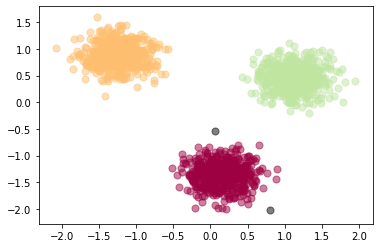

In [14]:
# Create colors for the clusters
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)
    
    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=col, marker=u'o', alpha=0.5)
    
    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=col, marker=u'o', alpha=0.5)

## 2. Weather Station Clustering

DBSCAN is specially very good for tasks like class identification on a spatial context. The wonderful attribute of DBSCAN algorithm is that it can find out any arbitrary shape cluster without getting affected by noise. 

In this example, we cluster the location of weather stations in Canada, to find the group of stations which show the same weather condition. As we will see, this method not only finds different arbitrary shaped clusters, it can also find the denser part of data-centered samples by ignoring less-dense areas or noises.

In [15]:
df = pd.read_csv('weather_stations.csv')

In [16]:
df.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


The dataset is of Environment Canada Monthly values for July-2015. Meaning of the columns: 
 - Stn_Name : Station Name
 - Lat : Latitude (North+, degrees)
 - Long : Longitude (West - , degrees)
 - Prov : Province
 - Tm : Mean Temperature (°C)
 - DwTm : Days without Valid Mean Temperature
 - D : Mean Temperature difference from Normal (1981-2010) (°C)
 - Tx : Highest Monthly Maximum Temperature (°C)
 - DwTx : Days without Valid Maximum Temperature
 - Tn : Lowest Monthly Minimum Temperature (°C)
 - DwTn : Days without Valid Minimum Temperature
 - S : Snowfall (cm)
 - DwS : Days without Valid Snowfall
 - S%N : Percent of Normal (1981-2010) Snowfall
 - P : Total Precipitation (mm)
 - DwP : Days without Valid Precipitation
 - P%N : Percent of Normal (1981-2010) Precipitation
 - S_G : Snow on the ground at the end of the month (cm)
 - Pd : Number of days with Precipitation 1.0 mm or more
 - BS : Bright Sunshine (hours)
 - DwBS : Days without Valid Bright Sunshine
 - BS : Percent of Normal (1981-2010) Bright Sunshine
 - HDD : Degree Days below 18 °C
 - CDD : Degree Days above 18 °C
 - Stn_No : Climate station identifier (first 3 digits indicate   drainage basin, last 4 characters are for sorting alphabetically)


First, we remove the rows that do not have any value in the Tm field

In [17]:
df = df[pd.notnull(df['Tm'])]
df = df.reset_index(drop = 'True')

In [18]:
df.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710


In [19]:
from mpl_toolkits.basemap import Basemap
from pylab import rcParams

rcParams['figure.figsize'] = (14,10)

llon=-140
ulon=-50
llat=40
ulat=65

df = df[(df['Long'] > llon) & (df['Long'] < ulon) & (df['Lat'] > llat) &(df['Lat'] < ulat)]

my_map = Basemap(projection='merc',
                 resolution = 'l', area_thresh = 1000.0,
                 llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
                 urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
# my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations

xs,ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))
df['xm']= xs.tolist()
df['ym'] =ys.tolist()

#Visualization1
for index,row in pdf.iterrows():
    #x,y = my_map(row.Long, row.Lat)
    my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'